
# IMPORTING NECESSARY LIBRARIES AND LOADING THE TRAINING DATASET

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


2023-11-30 19:42:15.384206: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df[df['toxic']== 1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


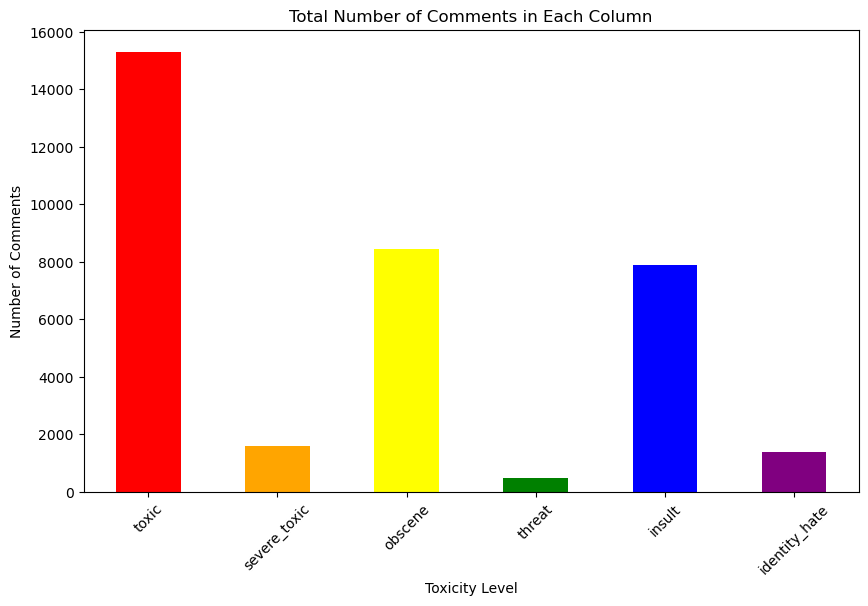

In [5]:
import matplotlib.pyplot as plt
import pandas as pd


column_counts = df.drop(['id', 'comment_text'], axis=1).sum()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']


plt.figure(figsize=(10, 6))
column_counts.plot(kind='bar', color=colors)
plt.title('Total Number of Comments in Each Column')
plt.xlabel('Toxicity Level')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()


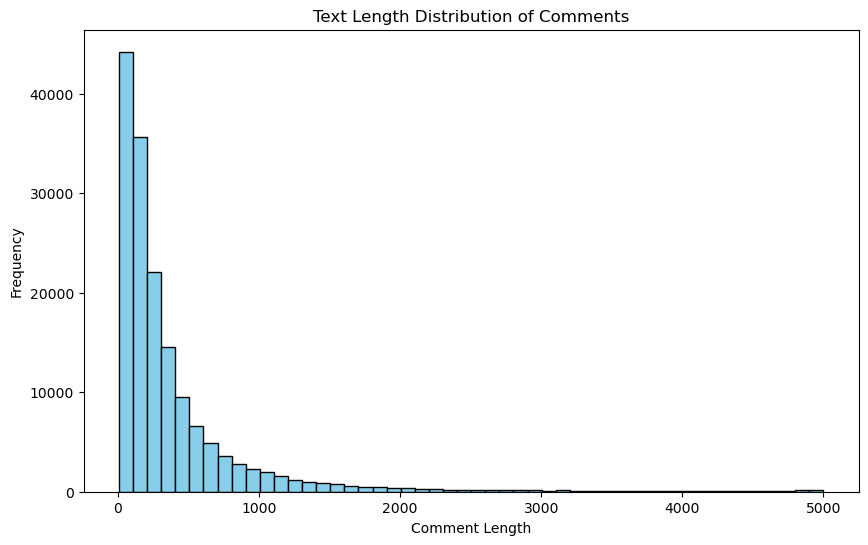

In [6]:
import matplotlib.pyplot as plt


df['comment_length'] = df['comment_text'].apply(len)


plt.figure(figsize=(10, 6))
plt.hist(df['comment_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution of Comments')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()


# DATA PRE PROCESSING AND CLEANING 

In [7]:
from tensorflow.keras.layers import TextVectorization
import sklearn
import os
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/manish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
STOPWORDS = set(stopwords.words('english'))
def preprocess(data):

   #CREATING A SET OF STOPWORDS
    stopwords_english = set(stopwords.words('english'))

    cleaneddata = []
    for text in data:

        #LOWER CASE
        text = text.lower()

        #REMOVING LINKS
        text = re.sub(r'https?://[^\s\n\r]+', '', text)

        #REMOVING PUNCTUATION
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

        #REMOVING WORDS CONTAINING NUMBERS
        text = re.sub(r'\w*\d\w*', '', text)

       #TOKENIZING AND REMOVING STOPWORDS
        words = text.split()
        words = [word for word in words if word not in stopwords_english]

        cleaneddata.append(' '.join(words))
    return cleaneddata

In [9]:
df['comment_text'] = preprocess(df['comment_text'])


In [10]:
df['comment_text']

0         explanation edits made username hardcore metal...
1         daww matches background colour im seemingly st...
2         hey man im really trying edit war guy constant...
3         cant make real suggestions improvement wondere...
4                       sir hero chance remember page thats
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm theres actual article prostitution...
159569    looks like actually put speedy first version d...
159570    really dont think understand came idea bad rig...
Name: comment_text, Length: 159571, dtype: object

In [11]:
df = df.drop('comment_length', axis=1)
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts...,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0,0,0,0,0,0
159569,fff125370e4aaaf3,looks like actually put speedy first version d...,0,0,0,0,0,0


In [13]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [14]:
x= df['comment_text']
y= df[df.columns[2:]].values

In [15]:
x

0         explanation edits made username hardcore metal...
1         daww matches background colour im seemingly st...
2         hey man im really trying edit war guy constant...
3         cant make real suggestions improvement wondere...
4                       sir hero chance remember page thats
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm theres actual article prostitution...
159569    looks like actually put speedy first version d...
159570    really dont think understand came idea bad rig...
Name: comment_text, Length: 159571, dtype: object

In [16]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

##### SINCE THE FITTING OF THE MODEL TOOK HOURS AND THE COMPUTATIONAL LOAD WAS HIGH ON MY MACHINE...I AM TAKING A SUBSET OF MY TRAIN DATA FOR TRAINING

In [17]:

subset_size = 50000  
x, y = x[:subset_size], y[:subset_size]


In [19]:
x

0        explanation edits made username hardcore metal...
1        daww matches background colour im seemingly st...
2        hey man im really trying edit war guy constant...
3        cant make real suggestions improvement wondere...
4                      sir hero chance remember page thats
                               ...                        
49995    well shes done writing articles doesnt un use ...
49996    also atlantis wrap back maybe could listed gen...
49997    ive removed various references userpage wikipe...
49998      removal templates would grateful would rot hell
49999    exactly want drawing come first tooit satisfyi...
Name: comment_text, Length: 50000, dtype: object

In [20]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [21]:
#TEXT_VECTORIZATION

MAX_WORDS = 10000
vectorizer= TextVectorization(max_tokens= MAX_WORDS,
                             output_sequence_length = 300,
                             output_mode= 'int')

In [22]:
vectorizer.adapt(x.values)
vectorized_text = vectorizer(x.values)


In [23]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'article',
 'page',
 'wikipedia',
 'talk',
 'would',
 'please',
 'one',
 'like',
 'dont',
 'see',
 'also',
 'know',
 'think',
 'im',
 'edit',
 'articles',
 'people',
 'use',
 'may',
 'time',
 'thanks',
 'get',
 'even',
 'make',
 'good',
 'information',
 'could',
 'well',
 'want',
 'sources',
 'way',
 'first',
 'deletion',
 'pages',
 'name',
 'new',
 'go',
 'source',
 'help',
 'need',
 'editing',
 'say',
 'section',
 'many',
 'thank',
 'edits',
 'made',
 'used',
 'much',
 'user',
 'ive',
 'really',
 'discussion',
 'deleted',
 'find',
 'since',
 'work',
 'block',
 'right',
 'image',
 'point',
 'read',
 'look',
 'add',
 'still',
 'fuck',
 'take',
 'going',
 'fact',
 'said',
 'someone',
 'two',
 'back',
 'hi',
 'something',
 'link',
 'content',
 'youre',
 'stop',
 'without',
 'blocked',
 'added',
 'us',
 'utc',
 'list',
 'vandalism',
 'history',
 'thats',
 'editors',
 'removed',
 'another',
 'might',
 'note',
 'place',
 'never',
 'however',
 'doesnt',
 'sure',
 'welcome',
 

In [24]:
vectorized_text

<tf.Tensor: shape=(50000, 300), dtype=int64, numpy=
array([[ 556,   47,   48, ...,    0,    0,    0],
       [   1, 2135, 1322, ...,    0,    0,    0],
       [ 375,  318,   15, ...,    0,    0,    0],
       ...,
       [  52,   91,  591, ...,    0,    0,    0],
       [ 899, 1026,    6, ...,    0,    0,    0],
       [ 477,   30, 5593, ...,    0,    0,    0]])>

In [25]:
#PREPARING A TENSORFLOW DATASET
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(16000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [26]:
#SPLITTING THE DATASET


train_size = int(len(dataset) * 0.7)
val_size = int(len(dataset) * 0.2)
test_size = len(dataset) - train_size - val_size


train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)

# MODEL BUILDING

In [27]:

model = Sequential()
model.add(Embedding(MAX_WORDS + 1, 32, input_length= 300))
model.add(Bidirectional(LSTM(16, activation='tanh')))
model.add(Dense(32, activation='relu'))  
model.add(Dense(6, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['binary_accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])



In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 32)           320032    
                                                                 
 bidirectional (Bidirection  (None, 32)                6272      
 al)                                                             
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 327558 (1.25 MB)
Trainable params: 327558 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### FITTING THE MODEL IN THE TRAIN SET AND CALCULATING THE VALIDATION LOSS

In [29]:
history= model.fit(train, epochs=5, validation_data= val)

Epoch 1/5
2187/2187 [==============================] - 385s 172ms/step - loss: 0.0946 - binary_accuracy: 0.9728 - precision: 0.7402 - recall: 0.4211 - val_loss: 0.0552 - val_binary_accuracy: 0.9811 - val_precision: 0.8234 - val_recall: 0.6294
Epoch 2/5
2187/2187 [==============================] - 349s 160ms/step - loss: 0.0533 - binary_accuracy: 0.9810 - precision: 0.8072 - recall: 0.6421 - val_loss: 0.0516 - val_binary_accuracy: 0.9818 - val_precision: 0.8102 - val_recall: 0.6515
Epoch 3/5
2187/2187 [==============================] - 360s 165ms/step - loss: 0.0485 - binary_accuracy: 0.9819 - precision: 0.8101 - recall: 0.6736 - val_loss: 0.0469 - val_binary_accuracy: 0.9829 - val_precision: 0.8005 - val_recall: 0.7042
Epoch 4/5
2187/2187 [==============================] - 392s 179ms/step - loss: 0.0438 - binary_accuracy: 0.9837 - precision: 0.8235 - recall: 0.7071 - val_loss: 0.0424 - val_binary_accuracy: 0.9845 - val_precision: 0.8455 - val_recall: 0.6911
Epoch 5/5
2187/2187 [=======

In [30]:
history.history

{'loss': [0.09459701925516129,
  0.05328454077243805,
  0.04845496639609337,
  0.04383591562509537,
  0.041702091693878174],
 'binary_accuracy': [0.9727709889411926,
  0.9810300469398499,
  0.9819352626800537,
  0.983715832233429,
  0.9843559265136719],
 'precision': [0.7401698231697083,
  0.80716472864151,
  0.8100721836090088,
  0.8234937787055969,
  0.8370588421821594],
 'recall': [0.42112621665000916,
  0.6421052813529968,
  0.6736465692520142,
  0.707136332988739,
  0.7233447432518005],
 'val_loss': [0.05520293116569519,
  0.05163292959332466,
  0.046869050711393356,
  0.042446110397577286,
  0.04136142507195473],
 'val_binary_accuracy': [0.9811499714851379,
  0.9818329811096191,
  0.9828997850418091,
  0.9845497012138367,
  0.984966516494751],
 'val_precision': [0.8233917951583862,
  0.8101772665977478,
  0.8005222082138062,
  0.8454911112785339,
  0.8680202960968018],
 'val_recall': [0.6294143795967102,
  0.6514942646026611,
  0.7041800618171692,
  0.6910797953605652,
  0.697326

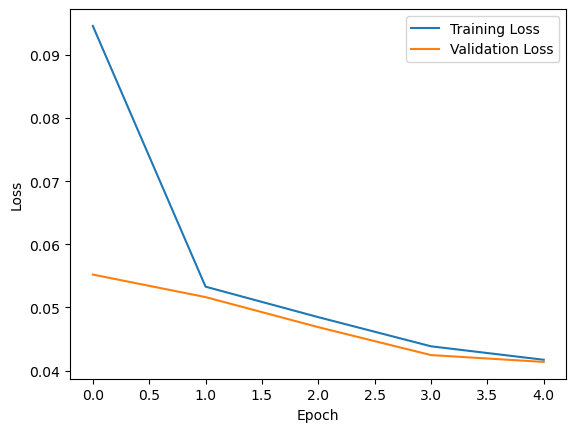

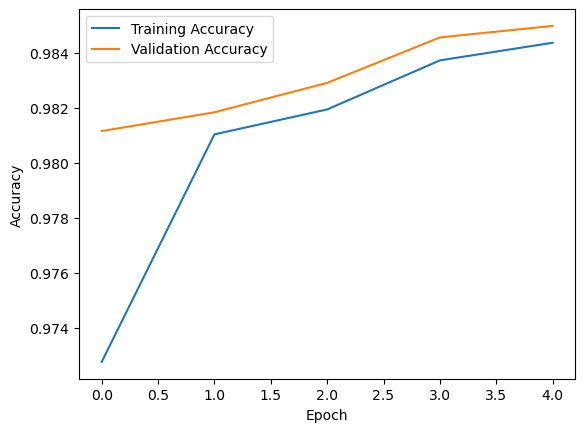

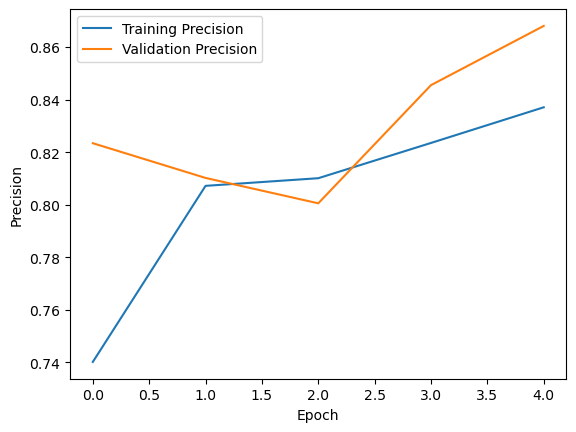

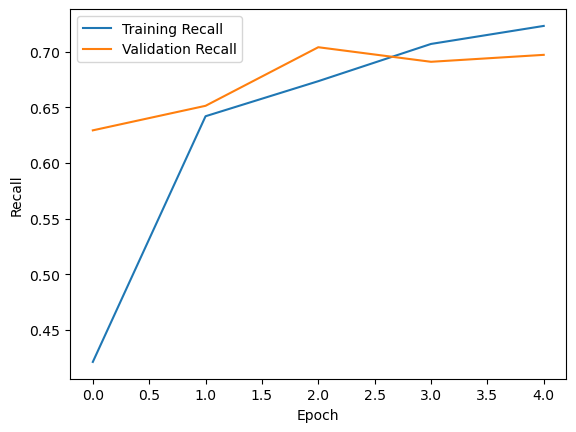

In [34]:
import matplotlib.pyplot as plt


training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['binary_accuracy']
validation_accuracy = history.history['val_binary_accuracy']
training_precision = history.history['precision']
validation_precision = history.history['val_precision']
training_recall = history.history['recall'] 
validation_recall = history.history['val_recall']

# Plotting training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation precision
plt.plot(training_precision, label='Training Precision')
plt.plot(validation_precision, label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plotting training and validation recall
plt.plot(training_recall, label='Training Recall')
plt.plot(validation_recall, label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()


#### EVALUATING THE MODEL ON THE TEST SET

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

test_loss, test_binary_accuracy, test_precision, test_recall= model.evaluate(test) 

print(f'Test Loss: {test_loss}')
print(f'Binary Accuracy: {test_binary_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')


313/313 [==============================] - 20s 63ms/step - loss: 0.0407 - binary_accuracy: 0.9852 - precision: 0.8727 - recall: 0.6975
Test Loss: 0.040718305855989456
Binary Accuracy: 0.9851902723312378
Precision: 0.8727272748947144
Recall: 0.6975476741790771


#### MAKING PREDICTION ON THE TEST SET

In [36]:
test_predictions = model.predict(test)

test_predictions

313/313 [==============================] - 24s 62ms/step


array([[2.14096415e-03, 9.06761579e-06, 7.92129547e-04, 2.09436512e-05,
        2.97063554e-04, 1.13681417e-04],
       [9.44077445e-04, 2.31414492e-06, 3.56060598e-04, 5.77398487e-06,
        1.08965054e-04, 3.93577466e-05],
       [3.40617634e-03, 1.57053128e-05, 9.95017588e-04, 3.72827599e-05,
        5.31192403e-04, 1.83981290e-04],
       ...,
       [7.18952203e-03, 5.98111619e-05, 1.92312803e-03, 1.89590835e-04,
        1.68458652e-03, 6.99806842e-04],
       [1.41333193e-02, 3.08376730e-05, 2.65553733e-03, 7.89682817e-05,
        1.63567369e-03, 4.26428946e-04],
       [1.42583484e-03, 5.07415143e-06, 5.62081113e-04, 1.37973793e-05,
        1.97712739e-04, 7.85512966e-05]], dtype=float32)

In [74]:
import numpy as np


average_probabilities = np.mean(test_predictions, axis=0)

print("Average Probabilities for Each Toxicity Level:")

for i, toxicity_level in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    print(f"{toxicity_level} : {average_probabilities[i]}") 

Average Probabilities for Each Toxicity Level:
toxic : 0.09680702537298203
severe_toxic : 0.007889226078987122
obscene : 0.053204722702503204
threat : 0.0025118039920926094
insult : 0.04476075991988182
identity_hate : 0.007620517630130053


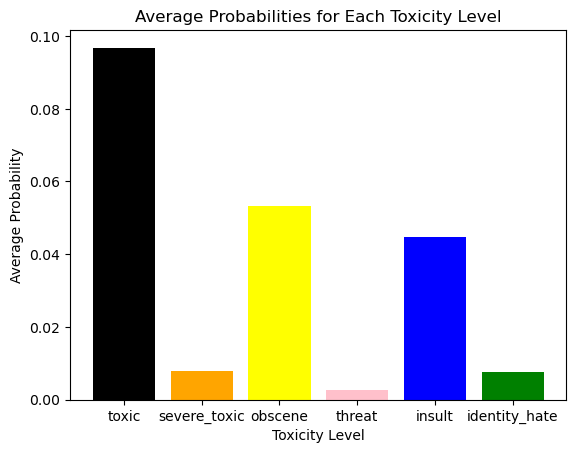

In [75]:

import matplotlib.pyplot as plt


average_probabilities = np.array(average_probabilities)
toxicity_levels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
colors = ['black', 'orange', 'yellow', 'pink', 'blue', 'green']


plt.bar(toxicity_levels, average_probabilities, color=colors)
plt.xlabel('Toxicity Level')
plt.ylabel('Average Probability')
plt.title('Average Probabilities for Each Toxicity Level')
plt.show()


# PREDICTING ON THE NEW TEST DATASET WITH ITS LABELS


In [76]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk

import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


In [77]:
newtestdata= pd.read_csv('test.csv')
newtestdata

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [78]:
STOPWORDS = set(stopwords.words('english'))
def preprocess(data):


    stopwords_english = set(stopwords.words('english'))

    cleaneddata = []
    for text in data:


        text = text.lower()
        text = re.sub(r'https?://[^\s\n\r]+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub(r'\w*\d\w*', '', text)
        words = text.split()
        words = [word for word in words if word not in stopwords_english]

        cleaneddata.append(' '.join(words))
    return cleaneddata

In [79]:
newtestdata['comment_text'] = preprocess(newtestdata['comment_text'])

In [80]:
vectorized_testdata= vectorizer(newtestdata['comment_text'].values)
vectorized_testdata

<tf.Tensor: shape=(153164, 300), dtype=int64, numpy=
array([[2283,  813, 7911, ...,    0,    0,    0],
       [1121,  272,  538, ...,    0,    0,    0],
       [  31,    1,    1, ...,    0,    0,    0],
       ...,
       [   1,  974,   11, ...,    0,    0,    0],
       [   8, 5708, 1625, ...,    0,    0,    0],
       [  80,  130, 1946, ...,    0,    0,    0]])>

## MAKING PREDICTIONS ON THE NEW TEST DATASET

In [81]:
predictions = model.predict(vectorized_testdata)
predictions

4787/4787 [==============================] - 194s 40ms/step


array([[9.9452287e-01, 2.7878916e-01, 9.6852976e-01, 5.9550919e-02,
        8.6678439e-01, 1.6527006e-01],
       [9.9518686e-04, 2.6365949e-06, 3.6405501e-04, 7.8931989e-06,
        1.3657950e-04, 4.9318689e-05],
       [1.4329304e-02, 1.1997884e-04, 3.1460258e-03, 4.3778843e-04,
        3.5503071e-03, 1.3793771e-03],
       ...,
       [2.2918459e-03, 8.2311963e-06, 8.1128167e-04, 1.8245752e-05,
        3.0834044e-04, 1.1163690e-04],
       [6.8943053e-03, 2.4129198e-05, 1.8003185e-03, 6.6665772e-05,
        1.0446104e-03, 3.4125225e-04],
       [9.7059882e-01, 3.5971660e-02, 7.6596892e-01, 1.9398244e-02,
        5.5363137e-01, 7.3897690e-02]], dtype=float32)

In [82]:
import numpy as np


mean_probabilities = np.mean(predictions, axis=0)

print("Mean Probabilities for Each Toxicity Level:")

for i, toxicity_level in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    print(f"{toxicity_level} : {mean_probabilities[i]}") 

Mean Probabilities for Each Toxicity Level:
toxic : 0.2185095250606537
severe_toxic : 0.01546752080321312
obscene : 0.12634702026844025
threat : 0.005378141533583403
insult : 0.10283063352108002
identity_hate : 0.016864990815520287


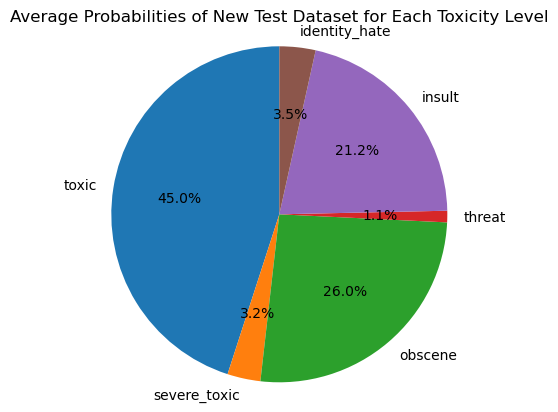

In [83]:
import matplotlib.pyplot as plt


average_probabilities = np.array(mean_probabilities)
toxicity_levels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


plt.pie(average_probabilities, labels=toxicity_levels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Average Probabilities of New Test Dataset for Each Toxicity Level')
plt.show()


# TEST LABELS

In [84]:
true_labels = pd.read_csv('test_labels.csv')
true_labels

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [85]:
from sklearn.metrics import classification_report

mask = (true_labels[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] != -1).any(axis=1)


predictions_filtered = predictions[mask]
predictions_filtered 

array([[1.43480988e-03, 4.53285338e-06, 4.83618525e-04, 1.25666038e-05,
        2.06096811e-04, 7.19743839e-05],
       [5.80390871e-01, 4.24745586e-03, 8.46267045e-02, 1.06238090e-02,
        1.42958030e-01, 2.51321383e-02],
       [9.01206583e-03, 3.76606804e-05, 2.35570711e-03, 8.23805021e-05,
        1.19254366e-03, 3.80511774e-04],
       ...,
       [5.99997520e-01, 4.57784766e-03, 9.96511877e-02, 1.07307183e-02,
        1.45771191e-01, 2.65127737e-02],
       [9.78318095e-01, 6.05347045e-02, 8.45817327e-01, 3.59332450e-02,
        6.88125014e-01, 1.07272319e-01],
       [2.72494112e-03, 1.05754825e-05, 9.63716768e-04, 2.39623259e-05,
        3.93861235e-04, 1.46445818e-04]], dtype=float32)

In [86]:
threshold = 0.5

binary_predictions = (predictions_filtered > threshold).astype(int)
binary_predictions

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [87]:
binary_predictions_df = pd.DataFrame(binary_predictions, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
binary_predictions_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
63973,0,0,0,0,0,0
63974,1,0,1,0,0,0
63975,1,0,0,0,0,0
63976,1,0,1,0,1,0


In [88]:
true_labels_filtered = true_labels[mask]
y_true = true_labels_filtered[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

report = classification_report(y_true, binary_predictions_df, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
print(report)


               precision    recall  f1-score   support

        toxic       0.50      0.79      0.61      6090
 severe_toxic       0.38      0.20      0.26       367
      obscene       0.58      0.70      0.63      3691
       threat       0.00      0.00      0.00       211
       insult       0.54      0.53      0.54      3427
identity_hate       0.00      0.00      0.00       712

    micro avg       0.53      0.64      0.58     14498
    macro avg       0.33      0.37      0.34     14498
 weighted avg       0.50      0.64      0.55     14498
  samples avg       0.07      0.06      0.06     14498



/Users/manish/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manish/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manish/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
